In [26]:
import os
from matplotlib import pyplot as plt
%matplotlib inline

from Test_testing import *
#old model
predict('/media/chintu/bharath_ext_hdd/Bharath/Attribute Classifier/ML-GCN_redefined/data/test/masked')

===== Use CPU to Test! =====

/media/chintu/bharath_ext_hdd/Bharath/Attribute Classifier/ML-GCN_redefined/data/test/masked
=> loaded checkpoint (epoch 10) with best_score: 15.943273544311523

Pre-trained G model is loaded.

===> Loaded datasets

Evaluating....


In [2]:
#segmented model 
# predict('/media/chintu/bharath_ext_hdd/Bharath/Attribute Classifier/ML-GCN-master/data/test/seg_test')

In [28]:
del train_csv

In [3]:
import pandas as pd
import numpy as np
import json
import pickle
from PIL import Image, ImageOps
from matplotlib import pyplot as plt
%matplotlib inline 


In [4]:
train_csv = pd.read_csv('/media/chintu/bharath_ext_hdd/Bharath/Attribute Classifier/train.csv')
train_csv.shape

(333401, 6)

In [5]:
# train_csv.head(10)
train_csv[train_csv['ImageId']=='1eb228db16bb5e0533d86de07a49a811']

ImageId  \
40018  1eb228db16bb5e0533d86de07a49a811   
40019  1eb228db16bb5e0533d86de07a49a811   
40020  1eb228db16bb5e0533d86de07a49a811   
40021  1eb228db16bb5e0533d86de07a49a811   
40022  1eb228db16bb5e0533d86de07a49a811   
40023  1eb228db16bb5e0533d86de07a49a811   
40024  1eb228db16bb5e0533d86de07a49a811   
40025  1eb228db16bb5e0533d86de07a49a811   
40026  1eb228db16bb5e0533d86de07a49a811   
40027  1eb228db16bb5e0533d86de07a49a811   
40028  1eb228db16bb5e0533d86de07a49a811   
40029  1eb228db16bb5e0533d86de07a49a811   

                                           EncodedPixels  Height  Width  \
40018  193918 3 194533 11 195149 18 195766 23 196385 ...     620    933   
40019  242360 8 242974 15 243591 19 244210 21 244831 ...     620    933   
40020  184046 9 184659 22 185276 27 185893 32 186510 ...     620    933   
40021  178251 23 178863 30 179475 38 180087 46 180700...     620    933   
40022  202877 36 203494 49 204111 62 204729 74 205346...     620    933   
40023  236965 1 237585 4 238205 7 238825 10 239445 13...     620    933   
40024  236965 1 237585 1 238205 1 238825 1 239445 1 2...     620    933   
40025  178251 23 178863 30 179475 38 180087 46 180700...     620    933   
40026  272975 3 273596 9 274217 18 274838 26 275459 2...     620    933   
40027  160394 1 161013 5 161632 7 162251 8 162868 11 ...     620    933   
40028  218291 9 218910 14 219530 15 220149 17 220768 ...     620    933   
40029  225724 4 226343 5 226962 7 227581 7 228200 7 2...     620    933   

       ClassId                       AttributesIds  
40018        6  36,115,128,136,154,230,295,298,317  
40019       23                                 NaN  
40020       23                                 NaN  
40021        9      79,115,136,145,149,295,311,317  
40022       25                                 NaN  
40023        1                               0,317  
40024       33                                 182  
40025       31                             160,205  
40026       31                             160,205  
40027       24                                 NaN  
40028       13                                 NaN  
40029       14                                 NaN

In [22]:
image_name='1eb228db16bb5e0533d86de07a49a811'
indexx = 40021


In [23]:
# train_csv.head()
img_path = '/media/chintu/bharath_ext_hdd/Bharath/Attribute Classifier/train/'+image_name+'.jpg'
encoded_pixels = train_csv[train_csv['ImageId']==image_name]['EncodedPixels'][indexx]
# encoded_pixels

im1 (933, 620)
imm2 (196, 253) 287 124 483 377


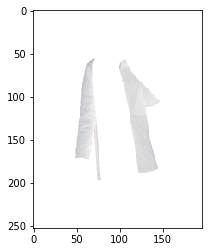

In [24]:

def rle_decode(mask_rle, shape):
    s = mask_rle
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)



im1 = Image.open(img_path).convert('RGB')
print('im1', im1.size)
pixels = encoded_pixels.split()
IMG_SHAPE=(int(im1.size[0]),int(im1.size[1]))

all_masks = np.zeros(IMG_SHAPE)
all_masks += rle_decode(pixels, shape=IMG_SHAPE)
# plt.imshow(all_masks.T)
# print(all_masks.T.shape)

# #crop orig image from mask
yy, xx = np.where(all_masks.T)
imm = np.array(im1)
imm[all_masks.T==0]=0

xx_min, xx_max = xx.min(), xx.max()
yy_min, yy_max = yy.min(), yy.max()

if xx_min==xx_max:
    xx_max= xx_min+2

if yy_min==yy_max:
    yy_max= yy_min+2

imm2 = Image.fromarray(np.uint8(imm)).crop([xx_min,yy_min,xx_max,yy_max])
# plt.imshow(imm)
org_w, org_h = imm2.size[0], imm2.size[1]
print("imm2",imm2.size,xx.min(),yy.min(),xx.max(),yy.max())
imm3 = ImageOps.expand(imm2,border=100,fill='black')
imm3 = imm3.resize((org_w, org_h), Image.ANTIALIAS)
# print(imm.size)

mask= np.array(imm3.resize(imm3.size).convert('L'))
mask = Image.fromarray(np.uint8(mask))
# plt.imshow(mask)
imm_copy = imm3.copy()
imm_copy.putalpha(mask)
plt.imshow(np.array(imm_copy))



In [25]:
imm_copy.save('1eb228db16bb5e0533d86de07a49a811_9_coat.png')

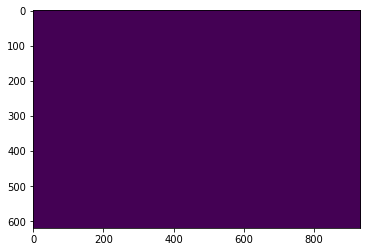

In [65]:
# imm.save('shoe.png')

(933, 620)
(620, 933)


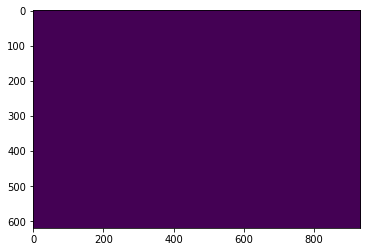

In [92]:
im1 = Image.open(img_path).convert('RGB')
print(im1.size)
pixels = encoded_pixels.split()
IMG_SHAPE=(int(im1.size[0]),int(im1.size[1]))

all_masks = np.zeros(IMG_SHAPE)
all_masks += rle_decode(pixels, shape=IMG_SHAPE)
plt.imshow(all_masks.T)
print(all_masks.T.shape)

TypeError: Image data of dtype object cannot be converted to float

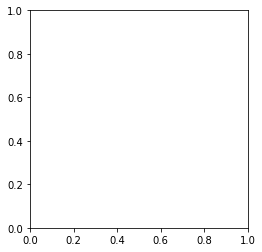

In [93]:

#crop orig image from mask
yy, xx = np.where(all_masks.T)
imm = np.array(im1)
imm[all_masks.T==0]=0
imm = Image.fromarray(np.uint8(imm)).crop([xx.min(),yy.min(),xx.max(),yy.max()])
plt.imshow(imm)
org_w, org_h = imm.size[0], imm.size[1]
imm = ImageOps.expand(imm,border=100,fill='black')
imm = imm.resize((org_w, org_h), Image.ANTIALIAS)
print(imm.size)

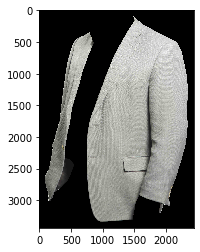

In [24]:
plt.imshow(imm)

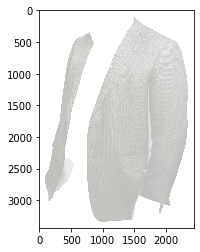

In [25]:
mask= np.array(imm.resize(imm.size).convert('L'))
mask = Image.fromarray(mask)
# plt.imshow(mask)
imm_copy = imm.copy()
imm_copy.putalpha(mask)
plt.imshow(np.array(imm_copy))

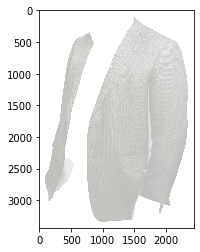

In [26]:
plt.imshow(np.array(imm_copy))

In [9]:
# imm_copy = imm.copy()
# imm_copy.putalpha(mask1)
# # print((np.array(imm_copy)[:,:,3]).min(), (np.array(imm_copy)[:,:,3]).max())#, (np.array(imm_copy)[:,:,3]))
# # plt.imshow(np.array(imm_copy))
# imm_copy.save('RGBA_mask_0_255.png')
# from IPython.display import Image as IM
# display(IM('RGBA_mask_0_255.png', width=150))

In [10]:
imm_copy.save('imm_copy_pant.png')

In [27]:
train_csv[train_csv['ImageId']=='02742511c1402dfa8de231a6d4a3f090']


ImageId  \
3218  02742511c1402dfa8de231a6d4a3f090   
3219  02742511c1402dfa8de231a6d4a3f090   
3220  02742511c1402dfa8de231a6d4a3f090   
3221  02742511c1402dfa8de231a6d4a3f090   
3222  02742511c1402dfa8de231a6d4a3f090   
3223  02742511c1402dfa8de231a6d4a3f090   

                                          EncodedPixels  Height  Width  \
3218  348950 1 350083 24 350228 3 351358 55 351506 6...    1280    852   
3219  461136 2 462415 4 463695 5 464976 5 466257 5 4...    1280    852   
3220  519575 7 520847 18 522123 25 523399 33 524672 ...    1280    852   
3221  506443 4 507720 13 508998 21 510276 29 511542 ...    1280    852   
3222  350611 9 351888 15 353166 10 353180 6 354443 1...    1280    852   
3223  353176 4 354455 5 355734 6 357014 7 358293 8 3...    1280    852   

      ClassId                        AttributesIds  
3218       10  101,115,130,145,151,234,295,316,317  
3219       33                                  183  
3220       23                                  NaN  
3221       21                                  NaN  
3222       23                                  NaN  
3223       21                                  NaN

In [35]:
import json
cat = json.load(open('/media/chintu/bharath_ext_hdd/Bharath/Attribute Classifier/ML-GCN_redefined/data/iMat/category.json','r'))
cat

{'shirt, blouse': 0,
 'top, t-shirt, sweatshirt': 1,
 'sweater': 2,
 'cardigan': 3,
 'jacket': 4,
 'vest': 5,
 'pants': 6,
 'shorts': 7,
 'skirt': 8,
 'coat': 9,
 'dress': 10,
 'jumpsuit': 11,
 'cape': 12,
 'glasses': 13,
 'hat': 14,
 'headband, head covering, hair accessory': 15,
 'tie': 16,
 'glove': 17,
 'watch': 18,
 'belt': 19,
 'leg warmer': 20,
 'tights, stockings': 21,
 'sock': 22,
 'shoe': 23,
 'bag, wallet': 24,
 'scarf': 25,
 'umbrella': 26,
 'hood': 27,
 'collar': 28,
 'lapel': 29,
 'epaulette': 30,
 'sleeve': 31,
 'pocket': 32,
 'neckline': 33,
 'buckle': 34,
 'zipper': 35,
 'applique': 36,
 'bead': 37,
 'bow': 38,
 'flower': 39,
 'fringe': 40,
 'ribbon': 41,
 'rivet': 42,
 'ruffle': 43,
 'sequin': 44,
 'tassel': 45,
 'classic (t-shirt)': 46,
 'polo (shirt)': 47,
 'undershirt': 48,
 'henley (shirt)': 49,
 'ringer (t-shirt)': 50,
 'raglan (t-shirt)': 51,
 'rugby (shirt)': 52,
 'sailor (shirt)': 53,
 'crop (top)': 54,
 'halter (top)': 55,
 'camisole': 56,
 'tank (top)': 57,


In [54]:
list_path = 'data/iMat/seg_train_anno_2020.json'
img_list = json.load(open(list_path, 'r'))

In [58]:
img_list[3195:3200]

[{'file_name': '3220_02742511c1402dfa8de231a6d4a3f090',
  'EncodedPixels': '519575 7 520847 18 522123 25 523399 33 524672 44 525941 39 525982 16 527211 48 527262 16 528482 55 528542 16 529754 61 529822 16 531015 79 531102 16 532295 78 532382 16 533576 77 533662 16 534856 76 534942 16 536136 76 536222 16 537417 75 537502 16 538697 74 538782 16 539977 74 540062 16 541258 73 541342 16 542538 72 542622 16 543818 72 543902 16 545098 72 545182 17 546379 71 546462 17 547659 72 547742 17 548939 72 549022 17 550219 72 550302 17 551500 72 551582 17 552780 72 552862 17 554060 72 554142 17 555340 72 555422 17 556620 73 556703 16 557900 73 557983 16 559180 73 559263 16 560460 73 560543 16 561740 74 561823 16 563020 74 563103 16 564300 74 564383 16 565580 75 565663 16 566860 75 566943 16 568140 76 568223 16 569419 79 569503 16 570699 81 570783 16 571979 83 572063 15 573258 100 574538 100 575818 100 577097 101 578377 101 579655 103 580932 101 582211 96 583492 94 584785 33 584827 38 586116 28 587405 1